# Dependencies

In [7]:
# Used Functions:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
from scipy import stats


# Developed Functions:
from Dev_Fun.Silhouette_Extraction import sil_preprocess, makeSegMask
from Dev_Fun.Joints_Extraction import mediapipe_detection, draw_landmarks
from Dev_Fun.Calibration_Show import Calib_Show
from Dev_Fun.Dataset_Capture import files_creation, dataset_capture


# Calibration
<img src="https://www.researchgate.net/profile/Jungpil-Shin/publication/362351225/figure/fig3/AS:1183521695645696@1659184969422/Mediapipe-detects-33-nodes-of-the-human-pose.ppm" width="400px">

In [8]:
#Feed Input Source
feed = 0
# Calib_Show(feed)

# Setup Folders

In [9]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Custom_Gait_Dataset_V.4')
EXPORTED = os.path.join('Exported')

# Persons that we try to detect
persons = np.array(['Hamza Tharwat','Lance Moheb','Mina Nady','Mohmed Youssef','Omar Amin','Romario Nagy','Seif Ibrahim','Ziad Diaa'])
# persons = np.array(['Lance Moheb'])

# 10 videos worth of data
no_sequences = 10

# Videos are going to be 30 frames in length
sequence_length = 90

persons_len = len(persons)
total_sequences = persons_len*no_sequences

# Capturing Dataset

In [10]:
# files_creation(persons,no_sequences,DATA_PATH)
# dataset_capture(persons,no_sequences,DATA_PATH,sequence_length,feed)

# Pre-Processing

* A) Importing Dataset

In [11]:
label_map = {label:num for num, label in enumerate(persons)}
print(label_map)

{'Hamza Tharwat': 0, 'Lance Moheb': 1, 'Mina Nady': 2, 'Mohmed Youssef': 3, 'Omar Amin': 4, 'Romario Nagy': 5, 'Seif Ibrahim': 6, 'Ziad Diaa': 7}


In [12]:
sequences, labels = [], []
for person in persons:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, person))).astype(int):
        window = []
        for frame_num in range(sequence_length):

            image_path = os.path.join(DATA_PATH, person, str(sequence), f"{frame_num}.jpg")
            print (image_path)
            res = cv2.imread(image_path)
            window.append(res)
        sequences.append(window)
        labels.append(label_map[person])

Custom_Gait_Dataset_V.4\Hamza Tharwat\0\0.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\1.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\2.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\3.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\4.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\5.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\6.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\7.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\8.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\9.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\10.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\11.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\12.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\13.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\14.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\15.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\16.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\17.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\18.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\19.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\20.jpg
Custom_Gait_Dataset_V.4

Custom_Gait_Dataset_V.4\Hamza Tharwat\0\72.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\73.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\74.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\75.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\76.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\77.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\78.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\79.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\80.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\81.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\82.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\83.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\84.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\85.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\86.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\87.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\88.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\0\89.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\1\0.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\1\1.jpg
Custom_Gait_Dataset_V.4\Hamza Tharwat\1\2.jpg
Custom_Gait_Data

(80, 90, 480, 640, 3)


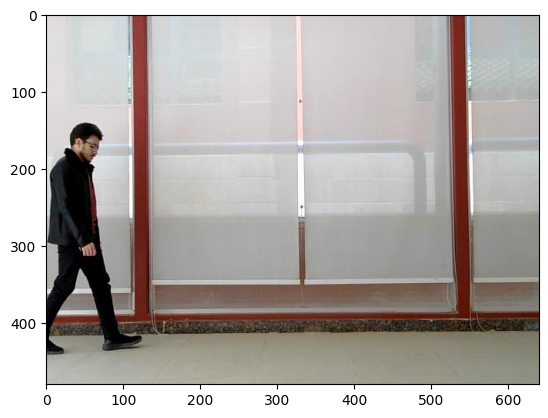

In [13]:
seqq=np.array(sequences)
print(seqq.shape)
show_test = cv2.cvtColor(seqq[1][40], cv2.COLOR_BGR2RGB)
plt.imshow(show_test)

* B) Converting to Silhouette Using:
    * Background Subtraction
    * Noise Reduction
    * Binarization

In [14]:
exported = []
fgbg = cv2.createBackgroundSubtractorKNN(detectShadows=False)
# for sequence in  range(total_sequences):
for sequence in  range(1):
    for frame_num in range(sequence_length):

        frame = cv2.cvtColor(seqq[sequence][frame_num], cv2.COLOR_BGR2RGB)

        sil = makeSegMask(frame)

        exported.append(sil)
        
        print (len(exported))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90


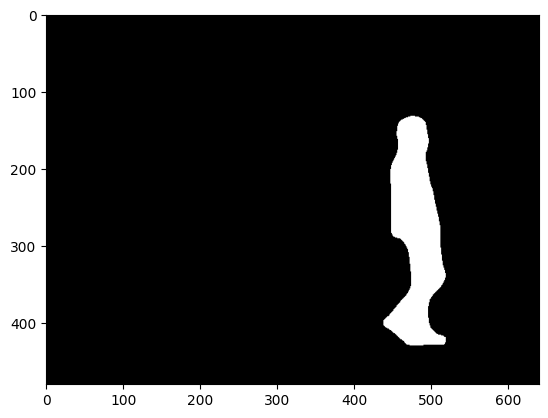

In [15]:
plt.imshow(exported[50],cmap='gray')

In [16]:
# Define the base directory where images will be stored
base_dir = "image_data"

# Define the sequences
sequences = [
    "bg-01", "bg-02",
    "cl-01", "cl-02",
    "nm-01", "nm-02", "nm-03", "nm-04", "nm-05", "nm-06"
]

# Loop through subject numbers
for subject_number in range(125, 132):  # assuming you want 10 subjects starting from 125
    subject_dir = os.path.join(base_dir, f"subject_{subject_number}")
    os.makedirs(subject_dir, exist_ok=True)
    
    # Loop through sequences
    for sequence in sequences:
        sequence_dir = os.path.join(subject_dir, sequence)
        os.makedirs(sequence_dir, exist_ok=True)
        
        # Load and save images for angle "090"
        angle_dir = os.path.join(sequence_dir, "090")
        os.makedirs(angle_dir, exist_ok=True)
        
        for frame_number in range(0, 90):  # assuming 90 frames
            # Construct the file name
            file_name = f"{subject_number}-{sequence}-090-{frame_number:03d}.jpg"
            file_path = os.path.join(angle_dir, file_name)
            
            # Load image (replace this with your actual loading mechanism)
            # For example, assuming your images are stored in a directory named 'exported':
            image_path = os.path.join("exported", file_name)
            image = cv2.imread(image_path)
            
            # Save image
            cv2.imwrite(file_path, image)


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:786: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [ ]:
# # Assuming each person has 10 sequences, and each sequence has 90 frames
# total_sequences = 10
# sequence_length = 90

# # Define the base directory where the images will be saved
# base_dir = "image_exports"

# # Create the base directory if it doesn't exist
# if not os.path.exists(base_dir):
#     os.makedirs(base_dir)

# # Iterate through each person
# for person_name in persons:
#     person_dir = os.path.join(base_dir, person_name)
#     # Create a directory for the person if it doesn't exist
#     if not os.path.exists(person_dir):
#         os.makedirs(person_dir)
    
#     # Iterate through each sequence for the person
#     for sequence in range(total_sequences):
#         sequence_dir = os.path.join(person_dir, f"sequence_{sequence+1}")
#         # Create a directory for the sequence if it doesn't exist
#         if not os.path.exists(sequence_dir):
#             os.makedirs(sequence_dir)
        
#         # Iterate through each frame in the sequence
#         for frame_num in range(sequence_length):
#             # Generate the filename for the frame
#             filename = f"frame_{frame_num+1}.png"
#             filepath = os.path.join(sequence_dir,"090", filename)
            
#             # Check if there are still images in the exported array
#             if len(exported) > 0:
#                 # Retrieve and save the next image from the exported array
#                 cv2.imwrite(filepath,cv2.flip(exported.pop(0),1))
#             else:
#                 # If there are no more images in the exported array, break the loop
#                 break

* C) Removing Unwanted bLacks

In [ ]:
# # Function to crop silhouette images to the person
# def crop_to_person(images):
#     cropped_images = []
#     for image in images:
#         # Find contours
#         contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
#         # Find the bounding box enclosing the contour
#         if contours:
#             x, y, w, h = cv2.boundingRect(contours[0])
#             cropped_image = image[y:y+h, x:x+w]
#         else:
#             # If no contours found, return original image
#             cropped_image = image
        
#         cropped_images.append(cropped_image)
    
#     return cropped_images
# cropped_images = crop_to_person(exported)


In [ ]:
# plt.imshow(cropped_images[130],cmap='gray')

* E) GEI Generation

In [ ]:
# def compute_gei(images):
#     # Convert images to numpy array
#     images_array = np.array(images)

#     # Compute GEI by averaging along the first axis (assuming images are stacked along the first axis)
#     gei = np.mean(images_array, axis=0)

#     return gei

In [ ]:
# for frame in range(sequence_length):
#     temp = compute_gei(resized_images)
#     plt.imshow(temp,cmap='gray')

# Train

A) Splitting Dataset

In [ ]:
# X = np.array(sequences)
# y = to_categorical(labels).astype(int)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y)
# print(X_test.shape)
# print(y_test.shape)

B) Building CNN Architecture

In [ ]:
# log_dir = os.path.join('Logs')
# tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from tensorflow.keras.callbacks import TensorBoard

In [ ]:
# model = Sequential()
# model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(60,132)))
# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(persons.shape[0], activation='softmax'))

In [ ]:
# #Compilation
# model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
# model.fit(X_train, y_train, epochs=200, callbacks=[tb_callback])

C) Training Results

In [ ]:
# model.summary()

In [ ]:
# print("Evaluate on test data")
# results = model.evaluate(X_test, y_test, batch_size=128)
# print("test loss, test acc:", results)

In [ ]:
# res = model.predict(X_test)

In [ ]:
# persons[np.argmax(res[4])]

In [ ]:
# persons[np.argmax(y_test[4])]

In [ ]:
# model.save('train4.h5')

In [ ]:
# yhat = model.predict(X_test)

In [ ]:
# ytrue = np.argmax(y_test, axis=1).tolist()
# yhat = np.argmax(yhat, axis=1).tolist()

# multilabel_confusion_matrix(ytrue, yhat)

# accuracy_score(ytrue, yhat)

# Detection

In [ ]:
# colors = [(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16)]
# def prob_viz(res, actions, input_frame, colors):
#     output_frame = input_frame.copy()
#     for num, prob in enumerate(res):
#         cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
#         cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 1, cv2.LINE_AA)
        
#     return output_frame

In [ ]:
# # 1. New detection variables
# sequence = []
# sentence = []
# predictions = []
# threshold = 0.3

# cap = cv2.VideoCapture(feed)
# # Set mediapipe model
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     while cap.isOpened():

#         # Read feed
#         ret, frame = cap.read()

#         # Make detections
#         image, results = mediapipe_detection(frame, holistic)
#         print(results)
        
#         # Draw landmarks
#         draw_landmarks(image, results)
        
#         # 2. Prediction logic
#         keypoints = extract_keypoints(results)
#         sequence.append(keypoints)
#         sequence = sequence[-60:]
        
#         if len(sequence) == 60:
#             res = model.predict(np.expand_dims(sequence, axis=0))[0]
#             print(persons[np.argmax(res)])
#             predictions.append(np.argmax(res))
            
            
#         #3. Viz logic
#             if np.unique(predictions[-10:])[0]==np.argmax(res): 
#                 if res[np.argmax(res)] > threshold: 
                    
#                     if len(sentence) > 0: 
#                         if persons[np.argmax(res)] != sentence[-1]:
#                             sentence.append(persons[np.argmax(res)])
#                     else:
#                         sentence.append(persons[np.argmax(res)])

#             if len(sentence) > 5: 
#                 sentence = sentence[-5:]

#             # Viz probabilities
#             image = prob_viz(res, persons, image, colors)
            
#         cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
                
#         cv2.putText(image, ' '.join(sentence), (3,30), 
#                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 1, cv2.LINE_AA)
        
#         # Show to screen
#         cv2.imshow('Gait ID', image)

#         # Break gracefully
#         if cv2.waitKey(10) & 0xFF == 27:
#             break
#     cap.release()
#     cv2.destroyAllWindows()